<a href="https://colab.research.google.com/github/GabrielG1997/COLAB/blob/main/YOLOv5_DIO_Exercise_Image_Detection_Pills_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection with Darknet in Google Colab

## Description

This notebook is a personal exercise based on the knowledge acquired during the DIO Bootcamp "BairesDev - Machine Learning Practitioner", aiming to reinforce understanding of object detection with Darknet within a Google Colab environment.  This notebook was created with Chat-GPT outputs

In [1]:
# Installing and configuring environment

# Installing dependencies
!pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118  # PyTorch compatível com GPUs do Colab
!pip install -q seaborn matplotlib tqdm opencv-python-headless
# importing necessary libraries.
from pathlib import Path
from IPython.display import Image

In [2]:
# Rep clone -> YOLOv5
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17075 (delta 19), reused 7 (delta 7), pack-reused 17049 (from 2)
Receiving objects: 100% (17075/17075), 15.69 MiB | 8.69 MiB/s, done.
Resolving deltas: 100% (11724/11724), done.
/content/yolov5


In [3]:
# Print default classess YOLOv5 (dataset coco128)
coco_classes_path = Path("/content/yolov5/data/coco128.yaml")

with open(coco_classes_path, 'r') as f:
    data = f.read()
    print(data)

# Ultralytics YOLOv5 🚀, AGPL-3.0 license
# COCO128 dataset https://www.kaggle.com/datasets/ultralytics/coco128 (first 128 images from COCO train2017) by Ultralytics
# Example usage: python train.py --data coco128.yaml
# parent
# ├── yolov5
# └── datasets
#     └── coco128  ← downloads here (7 MB)

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco128 # dataset root dir
train: images/train2017 # train images (relative to 'path') 128 images
val: images/train2017 # val images (relative to 'path') 128 images
test: # test images (optional)

# Classes
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: hand

In [4]:
# Install YOLOv5 dependencies
!pip install -qr requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 36.1 MB/s eta 0:00:00


In [ ]:
# Create structure folder
!mkdir -p dataset/images/train dataset/images/val dataset/labels/train dataset/labels/val

The dataset used during this exercise was downloaded from [RoboFlow](https://universe.roboflow.com/roboflow-100/pills-sxdht/dataset/2)

In [5]:
# Print new classes definined in the data.yaml file
custom_classes_path = Path("/content/yolov5/data.yaml")

with open(custom_classes_path, 'r') as f:
    data = f.read()
    print(data)

train: ../train/images
val: ../valid/images

nc: 8
names: ['Cipro 500', 'Ibuphil 600 mg', 'Ibuphil Cold 400-60', 'Xyzall 5mg', 'blue', 'pink', 'red', 'white']


In [7]:
# Start training with new classes
!python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --freeze 10


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-23 15:52:46.445782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-23 15:52:46.467626: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-23 15:52:46.473752: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

In [12]:
# Test model after training using new weights
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source dataset/valid/images


detect: weights=['runs/train/exp2/weights/best.pt'], source=dataset/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/90 /content/yolov5/dataset/valid/images/20210702_161003_jpg.rf.b7f38d4a9cfdb2a84d6a084776c21b3c.jpg: 640x640 1 white, 11.7ms
image 2/90 /content/yolov5/dataset/valid/images/20210702_161018_jpg.rf.01aeda9c520e44575b888e675e5326ee.jpg: 640x640 1 red, 11.6ms
image 3/90 /content/yolov5/dataset/valid/images/

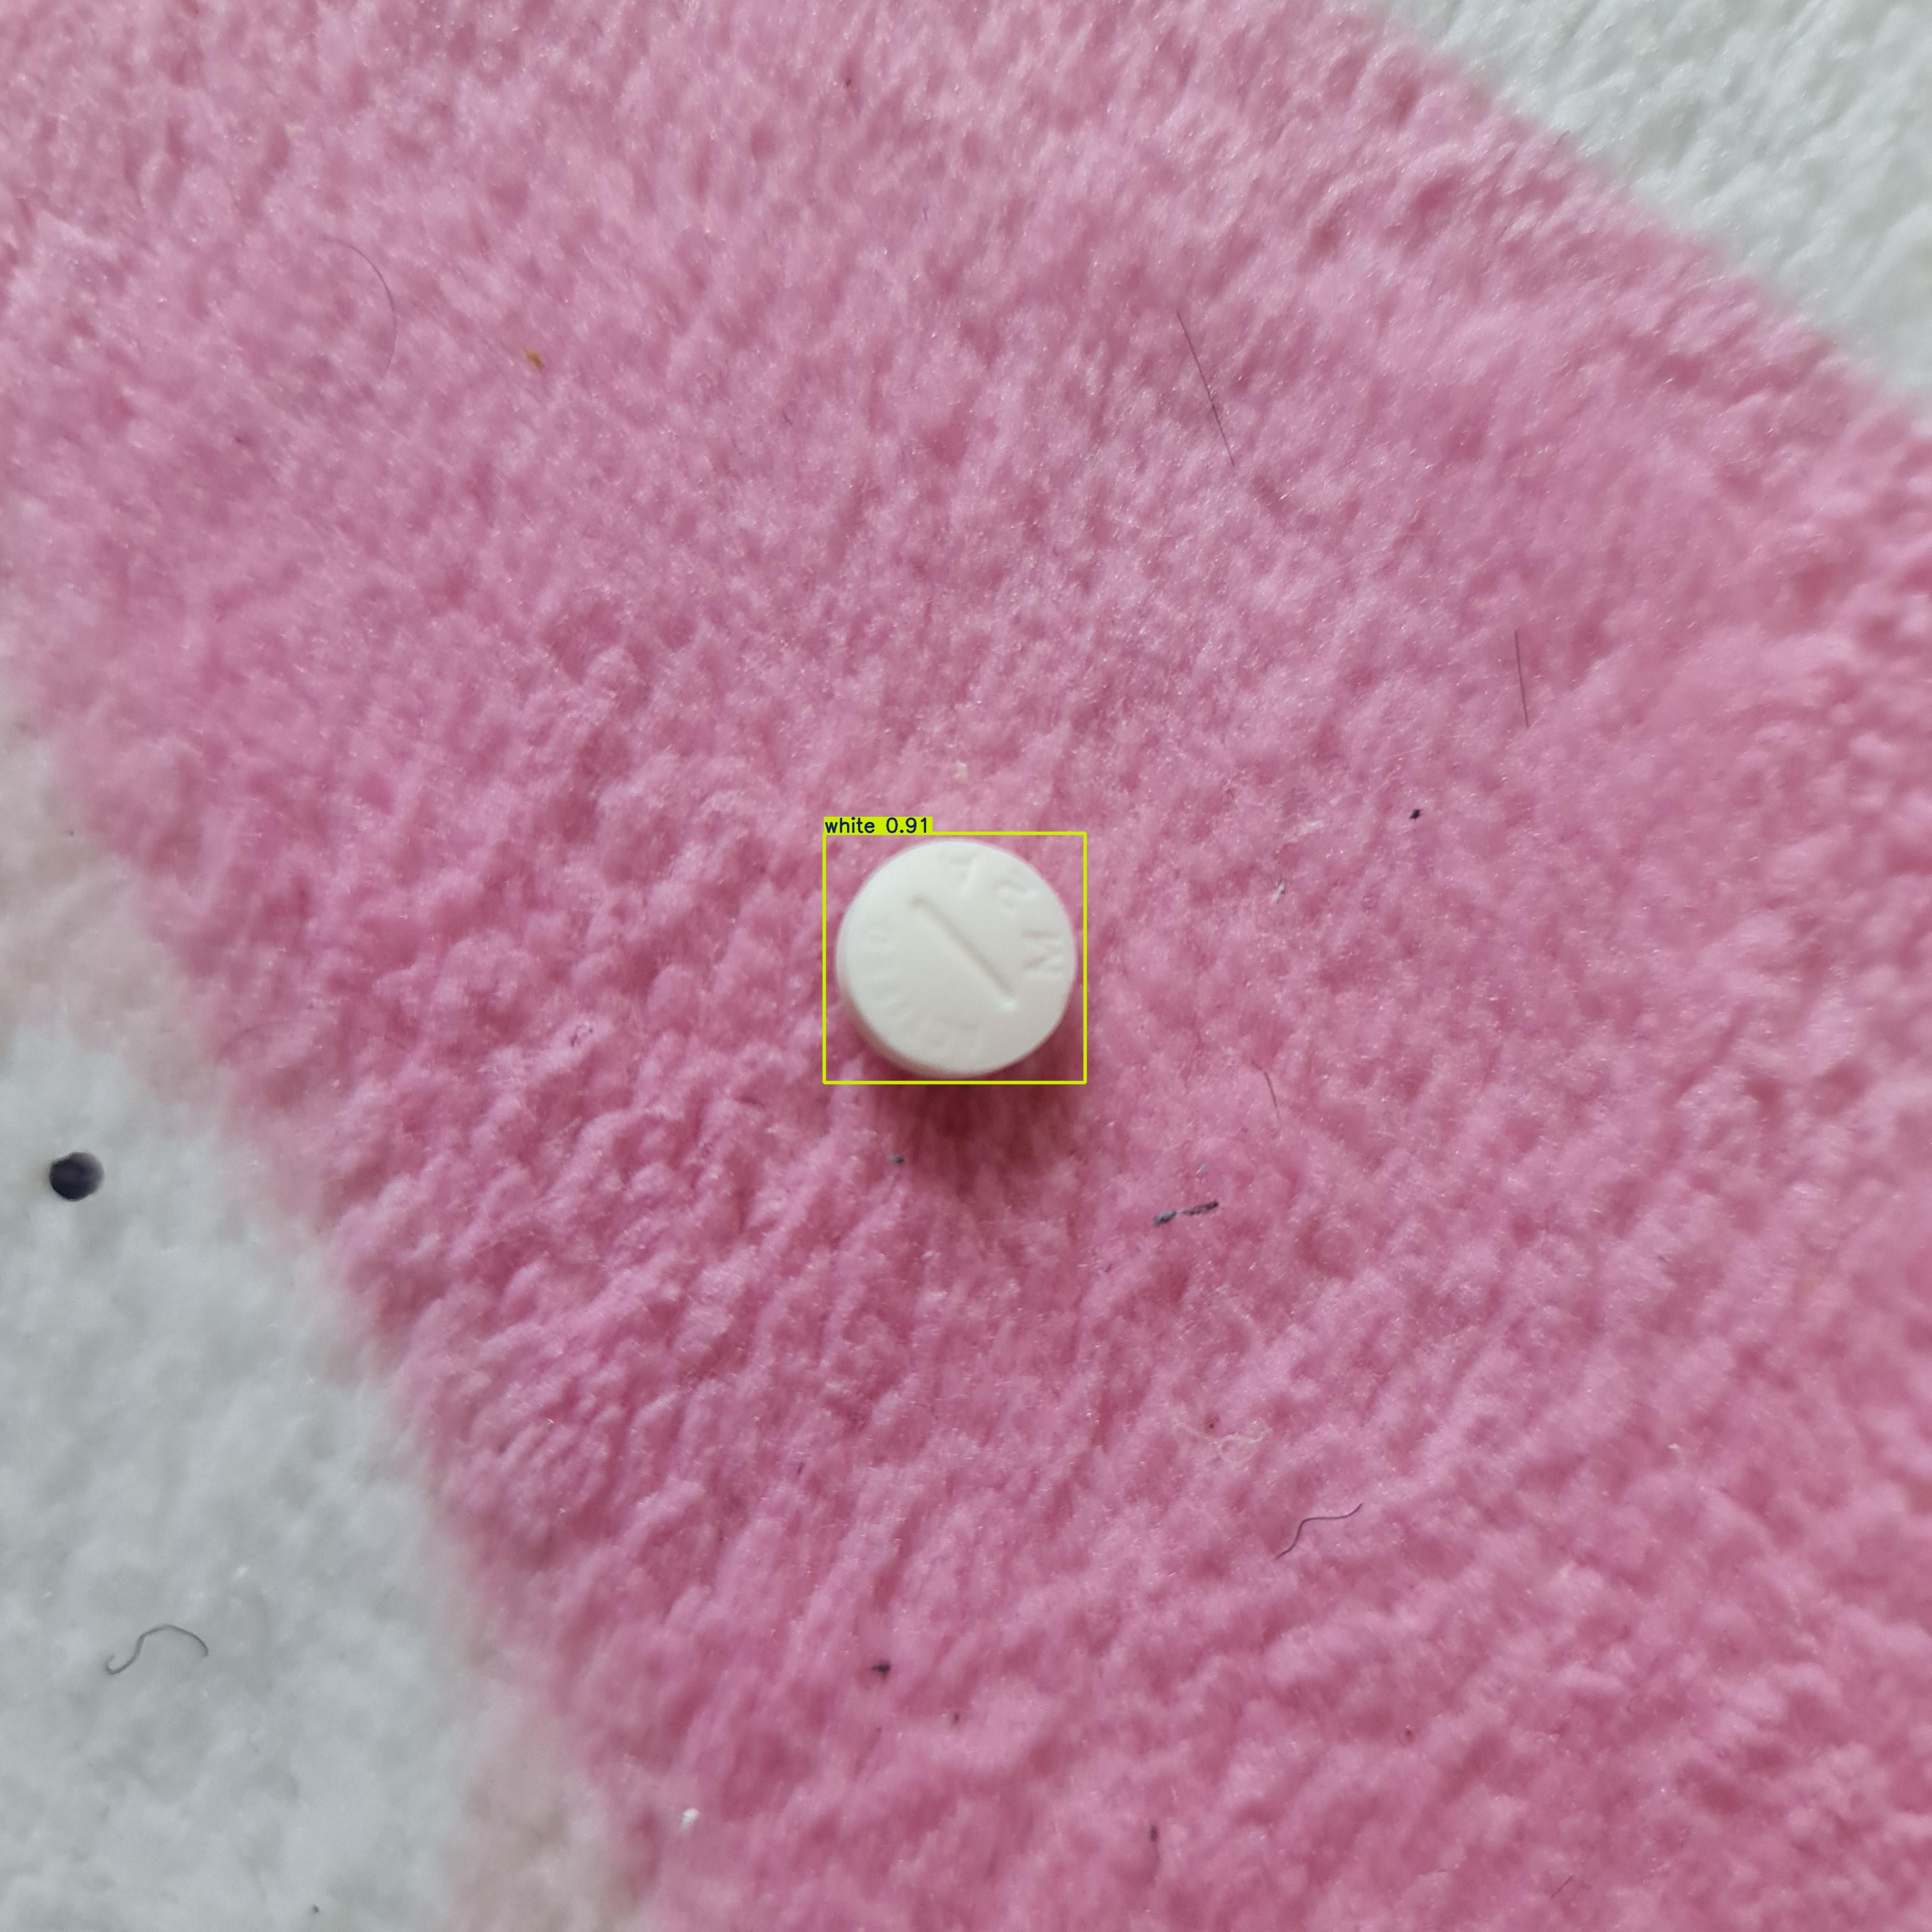

In [13]:

# Shows an example
Image(filename='/content/yolov5/runs/detect/exp4/20210702_161003_jpg.rf.b7f38d4a9cfdb2a84d6a084776c21b3c.jpg')
